In [8]:
#installing pycaret
!pip install pycaret

     |████████████████████████████████| 194kB 11.9MB/s 
     |████████████████████████████████| 7.0MB 14.8MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 3.1MB 56.8MB/s 
     |████████████████████████████████| 63.9MB 45kB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 266kB 57.8MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 389kB 55.4MB/s 
     |████████████████████████████████| 133kB 66.8MB/s 
     |████████████████████████████████| 1.6MB 49.8MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 235kB 66.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 6.2MB 52.1MB/s 
     |████████████████████████████████| 2.1MB 49.4MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 604kB 51.9MB/s 

In [9]:
#checking GPU details
!nvidia-smi

Sat Jun  6 22:34:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#importing libraries
import pandas as pd

In [11]:
#checking versions of libraries
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.6.9.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.104+
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.4
numpy            : 1.18.4
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 47.1.1
Cython           : 0.29.19
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.2
IPython          : 5.5.0
pandas_datareader: 0.8.1
bs4              : 4.6.3
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.2.6
matplotlib   

In [12]:
## Import dataset directly from github dataset raw url
url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv'
churn_data = pd.read_csv(url)
churn_data

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [0]:
from pycaret.classification import *

In [15]:
churn_setup = setup(data = churn_data, target = "Churn", ignore_features=['customerID'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7186
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7043, 10)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


We can see that our dataset contains some missing values so we can check and drop or impute it.

In [16]:
#checking for null values
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

Since the missing values is value low. So here we are droping it.

In [0]:
#Dropping null values
churn_data = churn_data.dropna(axis = 0)


In [18]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
tenure              0
ServiceCount        0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# Setting up independent and dependent variable
churn_setup = setup(data = churn_data, target = "Churn", ignore_features=['customerID'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2530
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7016, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Now we can see our dataset does not contains null values

In [21]:
#Printing the output
churn_setup

(      tenure  MonthlyCharges  ...  Contract_Two year  PaperlessBilling_No
 0        1.0           29.85  ...                0.0                  0.0
 1       34.0           56.95  ...                0.0                  1.0
 2        2.0           53.85  ...                0.0                  0.0
 3       45.0           42.30  ...                0.0                  1.0
 4        2.0           70.70  ...                0.0                  0.0
 ...      ...             ...  ...                ...                  ...
 7038    24.0           84.80  ...                0.0                  0.0
 7039    72.0          103.20  ...                0.0                  0.0
 7040    11.0           29.60  ...                0.0                  0.0
 7041     4.0           74.40  ...                0.0                  0.0
 7042    66.0          105.65  ...                1.0                  0.0
 
 [7016 rows x 18 columns], 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 7038 

In [22]:
#applying compare_model function and using k-fold cross validation method
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.791900,0.835800,0.493900,0.641100,0.556800,0.424200
1,Logistic Regression,0.791500,0.831900,0.529100,0.629500,0.574000,0.437600
2,Gradient Boosting Classifier,0.789500,0.836100,0.482400,0.638300,0.548300,0.414900
3,Linear Discriminant Analysis,0.788800,0.826900,0.539800,0.620000,0.575800,0.436400
4,Ridge Classifier,0.788200,0.000000,0.480100,0.637000,0.546100,0.411900
5,Ada Boost Classifier,0.787600,0.833000,0.507700,0.624700,0.559300,0.421600
6,CatBoost Classifier,0.783100,0.826700,0.484700,0.617700,0.542500,0.403400
7,Light Gradient Boosting Machine,0.774800,0.819400,0.496100,0.590700,0.538500,0.391400
8,Random Forest Classifier,0.763600,0.772400,0.433400,0.574000,0.492900,0.343100
9,K Neighbors Classifier,0.757300,0.738500,0.437300,0.557400,0.489100,0.333300


In [23]:
xgb_boost = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8191,0.8576,0.5573,0.7019,0.6213,0.5045
1,0.7739,0.8386,0.4962,0.5909,0.5394,0.3911
2,0.7882,0.8263,0.5038,0.6286,0.5593,0.4221
3,0.8086,0.8281,0.5115,0.6907,0.5877,0.4666
4,0.7821,0.8311,0.4046,0.6463,0.4977,0.3678
5,0.8024,0.8628,0.5115,0.6700,0.5801,0.4540
6,0.7719,0.8110,0.4046,0.6092,0.4862,0.3472
7,0.7943,0.8181,0.5038,0.6471,0.5665,0.4344
8,0.7780,0.8442,0.5154,0.5929,0.5514,0.4049
9,0.8106,0.8522,0.5846,0.6609,0.6204,0.4949


In [24]:
tuned_xgb_model = tune_model('xgboost', optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8089,0.8344,0.5802,0.6609,0.6179,0.4912
1,0.7597,0.8033,0.5344,0.5512,0.5426,0.3797
2,0.7637,0.7881,0.5038,0.5641,0.5323,0.3749
3,0.7597,0.7798,0.4733,0.5586,0.5124,0.3544
4,0.7760,0.8029,0.4580,0.6061,0.5217,0.3791
5,0.8208,0.8516,0.5725,0.7009,0.6303,0.5136
6,0.7312,0.7462,0.3817,0.4950,0.4310,0.2589
7,0.7597,0.7698,0.4427,0.5631,0.4957,0.3409
8,0.7739,0.8163,0.5308,0.5798,0.5542,0.4032
9,0.7780,0.8094,0.5615,0.5840,0.5725,0.4227


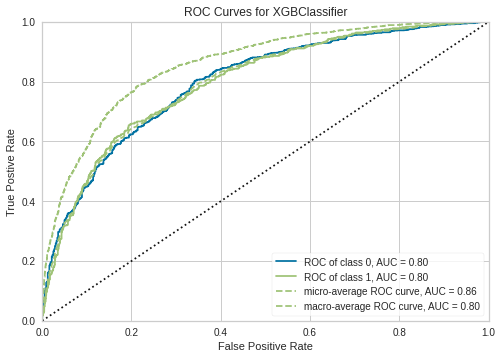

In [25]:
plot_model(tuned_xgb_model, plot = "auc")

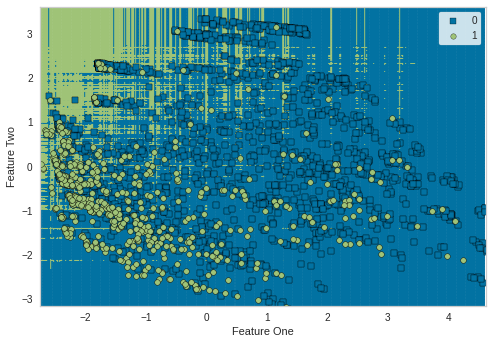

In [26]:
plot_model(tuned_xgb_model, plot = "boundary")

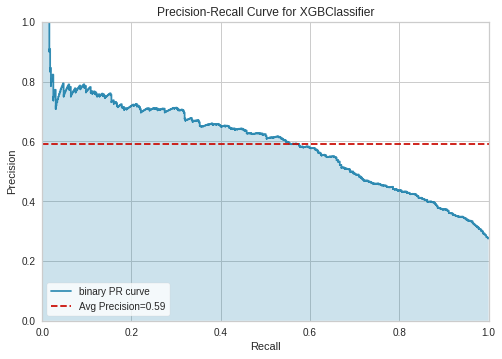

In [27]:
plot_model(tuned_xgb_model, plot = "pr")

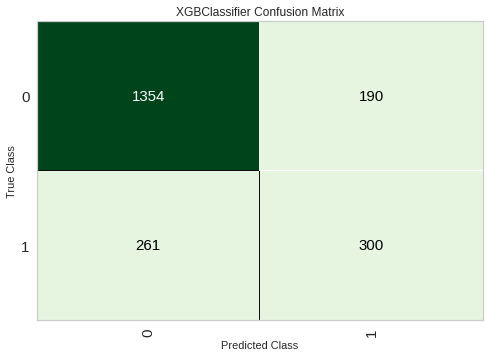

In [28]:
plot_model(tuned_xgb_model, plot = "confusion_matrix")

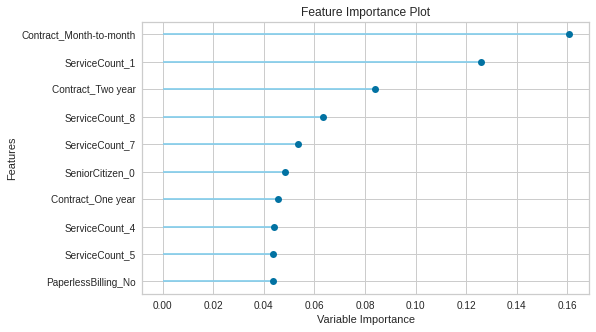

In [29]:
plot_model(tuned_xgb_model, plot = "feature")

In [30]:
predict_model(tuned_xgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7857,0.7975,0.5348,0.6122,0.5709,0.429


,tenure,MonthlyCharges,TotalCharges,gender_Female,SeniorCitizen_0,ServiceCount_1,ServiceCount_2,ServiceCount_3,ServiceCount_4,ServiceCount_5,ServiceCount_6,ServiceCount_7,ServiceCount_8,ServiceCount_9,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,Churn,Label,Score
0,9.0,54.55,494.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0.0235
1,12.0,99.95,1132.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9867
2,10.0,73.55,693.30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.1443
3,27.0,80.65,2209.75,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0579
4,25.0,18.70,383.65,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,33.0,44.55,1462.60,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.2266
2101,5.0,55.75,266.95,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.2269
2102,9.0,69.50,653.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.1012
2103,14.0,82.65,1185.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.2213


In [0]:
xgb_final = finalize_model(tuned_xgb_model)

In [32]:
#final xgb_model best parameter 
xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.12, max_delta_step=0, max_depth=50,
              min_child_weight=4, missing=None, n_estimators=700, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2530,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=0)

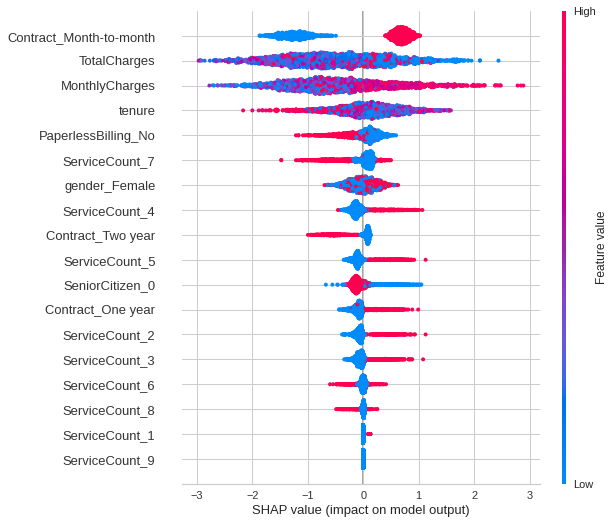

In [33]:
interpret_model(tuned_xgb_model)

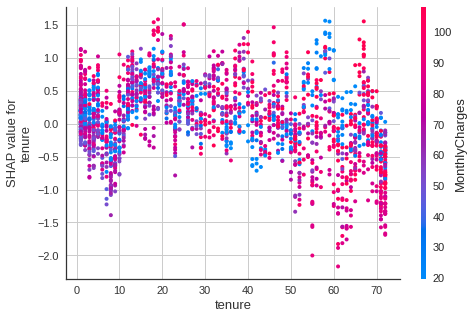

In [34]:
interpret_model(tuned_xgb_model, plot="correlation")

In [35]:
#Saving the model with the name "xgb_model" 
save_model(tuned_xgb_model, "xgb_model")

Transformation Pipeline and Model Succesfully Saved


In [36]:
!ls

catboost_info  sample_data  xgb_model.pkl


In [37]:
# Loading the saved model
load_xgb = load_model('xgb_model')

Transformation Pipeline and Model Sucessfully Loaded


In [38]:
load_xgb

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Cata...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9, gamma=0,
               learning_rate=0.12, max_delta_step=0, max_depth=50,
               min_child_weight=4, missing=nan, n_estimators=700, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2530,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.3, verbosity=0)]

In [42]:
evaluate_model(tuned_xgb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…